# Hypothesis Testing
Ways to perform Hypothesis testing : Z test and T test 

Population standard deviation should be known for Z-test

Sample standard deviation should be known for t-test

If Sample size > 30 then go for z-test

-One T-Test

-Two T-Test

-Paired T-Test 

-Chi-Sqaure Test

-ANOVA Test - Analysis of Variance

-One way Anova : when you have 1 independent feature(Smoker, Premium)

-Two way Anova : when you have 2 independent features(Smoker, Gender, Premium)


Type 1 error is alpha ( α ) has 3 values (0.05, 0.1, 0.01)
Type II error
Confidence Interval = 1 - α


In [2]:
#stat.ttest_1samp
#stat.ttest_ind
#stat.ttest_rel 
#stat.chi2_contigency
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
insurance_data = pd.read_csv("insurance.csv")

In [4]:
insurance_data.head()

,age,gender,bmi,children,smoker,region,Premium
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
insurance_data['age'].shape

(1338,)

In [11]:
insurance_data['age'].isnull().sum()

0

#### One-Sample T Test
The 1-sample t-test is used when we want to compare a sample mean to a population mean (which we already know). 

We want to know whether the mean of the sample is different from the population mean.
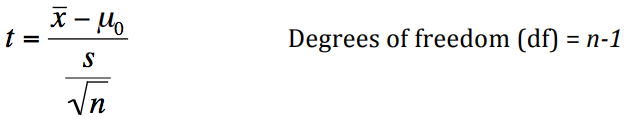


In [30]:
one_sample = stats.ttest_1samp(insurance_data["age"],1339)
one_sample

Ttest_1sampResult(statistic=-3383.97497297119, pvalue=0.0)

In [33]:
(one_sample[1]/2)<0.05

True

In [34]:
one_sample[0]<0

True

In [31]:
insurance_data["age"].mean()

39.20702541106129

# Other Example

In [62]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70,20,23,43,54,67,77,86,90]

In [63]:
len(ages)

40

In [65]:
ages_mean=np.mean(ages)
print(ages_mean)

35.775


In [64]:
## Lets take sample
sample_size=10
age_sample=np.random.choice(ages,sample_size)
age_sample

array([19, 35, 30, 18, 16, 77, 24, 25, 23, 55])

In [69]:
ttest,p_value=stats.ttest_1samp(age_sample,35)
print(p_value)

0.6586455871498889


In [70]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


### Two-Sample T-Test
Tests weather the means of two populations are significantly different from one another

In [39]:
stats.ttest_ind(insurance_data["Premium"][insurance_data["age"]==18], insurance_data["Premium"][insurance_data["age"]==60])

Ttest_indResult(statistic=-5.363077829489712, pvalue=6.282840590546535e-07)

# Other Example

In [71]:
np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()

50.63333333333333

In [75]:
np.random.seed(6)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
classA_height=stats.poisson.rvs(loc=18,mu=30,size=60)

_,p_value=stats.ttest_ind(a=classA_height,b=ClassB_ages,equal_var=False)
p_value

0.023456927348370574

In [74]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are rejecting null hypothesis


#### Paired T-Test
When you want to check how different samples from the same group are, you can go for a paired T-test

In [80]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)
weight1,weight2

([25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45],
 array([22.90798428, 35.71566293, 30.46935341, 37.8211611 , 17.96812633,
        30.75111646, 25.76226443, 25.86196173, 29.89340493, 21.90878412,
        22.57501452, 30.50433822, 30.18743579, 27.28355929, 43.54476647]))

In [83]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})
weight_df.head(3)

,weight_10,weight_20,weight_change
0,25,22.907984,-2.092016
1,30,35.715663,5.715663
2,28,30.469353,2.469353


In [86]:
_,p_value=stats.ttest_rel(a=weight1,b=weight2)
p_value

0.11938807159661317

In [85]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


#### Chisquare test of independence

In [44]:
data = pd.crosstab(insurance_data["age"],insurance_data["smoker"])

In [45]:
data

smoker,no,occasionally,yes
age,,,
18,41,20,8
19,32,25,11
20,15,8,6
21,19,7,2
22,15,9,4
23,17,6,5
24,15,8,5
25,18,6,4
26,17,9,2


In [88]:
chi2, p_value, dof, exp = stats.chi2_contingency(data)

In [89]:
print(chi2, p_value)

97.67101579709478 0.32322320320687936


In [90]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


# ANOVA Test
The t-test works well when dealing with two groups, 
but sometimes we want to compare more than two groups at the same time.

For example, if we wanted to test whether (feature) differs based on some categorical variable like smoker, 
we have to compare the means of each level or group the variable

In [51]:
insurance_data.groupby("smoker").mean()

,age,bmi,children,Premium
smoker,,,,
no,39.125668,30.680488,1.084225,8357.458539
occasionally,39.746898,30.603635,1.101737,13668.206708
yes,38.368984,30.723824,1.122995,32065.019788


In [52]:
insurance_data['smoker'] = insurance_data['smoker'].astype('category')

In [53]:
#One Way Annova
result = ols('Premium~C(smoker)',data=insurance_data).fit()

In [54]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     502.1
Date:                Sat, 30 May 2020   Prob (F-statistic):          2.54e-163
Time:                        12:29:15   Log-Likelihood:                -14102.
No. Observations:                1338   AIC:                         2.821e+04
Df Residuals:                    1335   BIC:                         2.823e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  8357.4585    334.753     24.966      0.000    7700.759    9014.158
C(smoker)[T.occasionally]  5310.7482    565.731      9.387      0.000    4200.930    6420.566
C(smoker)[T.yes]           2.371e+04    748.531     31.672      0.000    2.22e+04    2.52e+04
==============================================================================
Omnibus:                      308.795   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              656.495
Skew:                           1.304   Prob(JB):                    2.78e-143
Kurtosis:                       5.230   Cond. No.                         3.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
aov_table = sm.stats.anova_lm(result, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(smoker),8.417370e+10,2.0,502.106215,2.539479e-163
Residual,1.119005e+11,1335.0,NaN,NaN


In [93]:
# Test for Homogeneity of Variance
# Levene’s test for homogeneity of variance is significant which indicates that the groups have un-equal variances.
# homogeneity of variance assumption should be checked for each level of the categorical variable
stats.levene(insurance_data["Premium"][insurance_data['smoker']=='yes'],
            insurance_data["Premium"][insurance_data['smoker']=='no'])

LeveneResult(statistic=240.06444438745686, pvalue=2.3481550266510762e-48)

In [94]:
# Test for Normality,The assumption of normality is tested on the residuals
# The results from the Shapiro-Wilk test is statistically significant which indicates that the residuals are not normally distributed.
# One could use the Jarque-Bera test provided, or one could use Shapiro or others.
stats.shapiro(result.resid)

(0.9091699123382568, 1.5988952916576224e-27)

In [96]:
#Two way Anova
model = ols('Premium ~ C(gender)*C(smoker)', insurance_data).fit()

In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     205.2
Date:                Sat, 30 May 2020   Prob (F-statistic):          2.24e-162
Time:                        13:03:15   Log-Likelihood:                -14095.
No. Observations:                1338   AIC:                         2.820e+04
Df Residuals:                    1332   BIC:                         2.823e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                    8719.2891    469.621     18.567      0.000    7798.012    9640.566
C(gender)[T.male]                            -729.5128    666.824     -1.094      0.274   -2037.652     578.627
C(smoker)[T.occasionally]                    3491.8169    795.080      4.392      0.000    1932.071    5051.563
C(smoker)[T.yes]                             2.221e+04   1105.572     20.090      0.000       2e+04    2.44e+04
C(gender)[T.male]:C(smoker)[T.occasionally]  3650.9636   1126.907      3.240      0.001    1440.258    5861.669
C(gender)[T.male]:C(smoker)[T.yes]           2769.1570   1498.623      1.848      0.065    -170.762    5709.076
==============================================================================
Omnibus:                      296.045   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.614
Skew:                           1.261   Prob(JB):                    7.70e-135
Kurtosis:                       5.173   Cond. No.                         9.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
#Creates Anova table
aov_table_1 = sm.stats.anova_lm(model, typ=2)
aov_table_1

,sum_sq,df,F,PR(>F)
C(gender),1.903033e+08,1.0,2.288813,1.305468e-01
C(smoker),8.372042e+10,2.0,503.460545,1.430356e-163
C(gender):C(smoker),9.611272e+08,2.0,5.779828,3.167247e-03
Residual,1.107491e+11,1332.0,NaN,NaN
